### Importações

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import missingno as msgno

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams["figure.figsize"]=(12, 7)

### Carregando base de dados:
 - Target: SeriousDlqin2yrs

In [3]:
df = pd.read_csv("data/cs-training.csv")
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

### EDA

Avaliando informações gerais da base de dados:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

Temos 10 colunas com 150k registros. Temos valores faltantes em "MonthlyIncome" e "NumberOfDependents". Vamos avaliar a porcentagem faltante por feature:

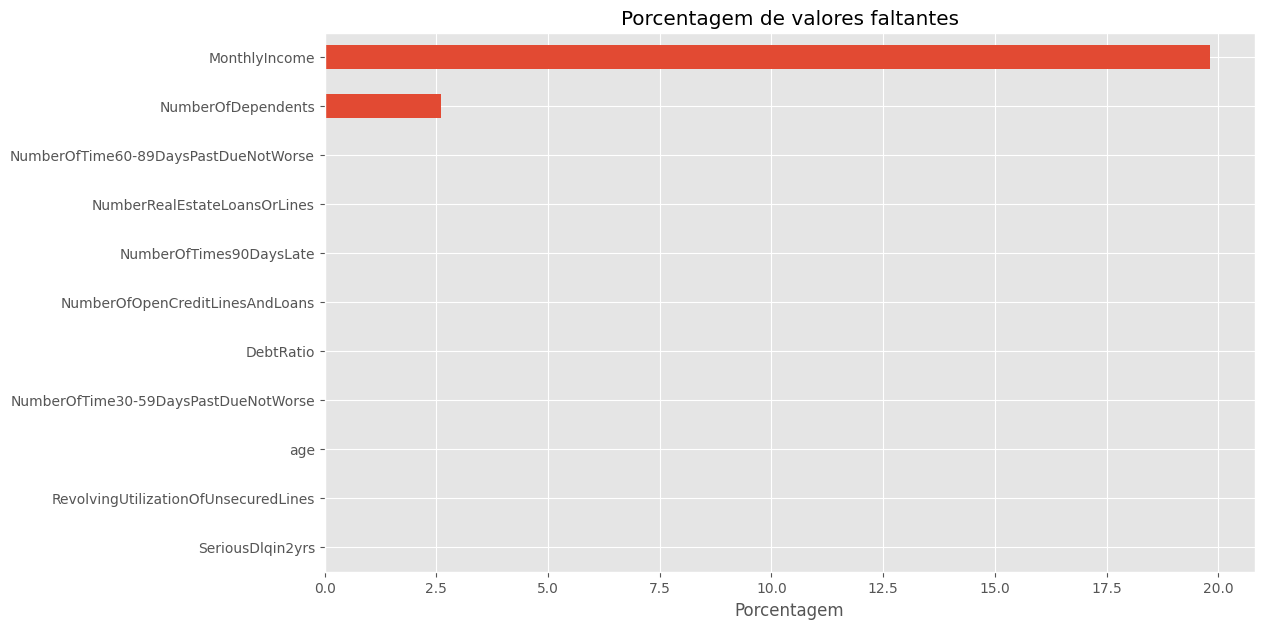

In [5]:
(100*df.isna().sum()/df.shape[0]).sort_values(ascending=True).plot.barh()
plt.xlabel("Porcentagem");
plt.title("Porcentagem de valores faltantes");

A feature MonthlyIncome possui ~20% de valores faltantes. A NumberOfDependents possui apenas ~2.5%. Vamos avaliar se existe algum padrão dos valores faltantes com os valores da inadimplência ordenada:

<Axes: >

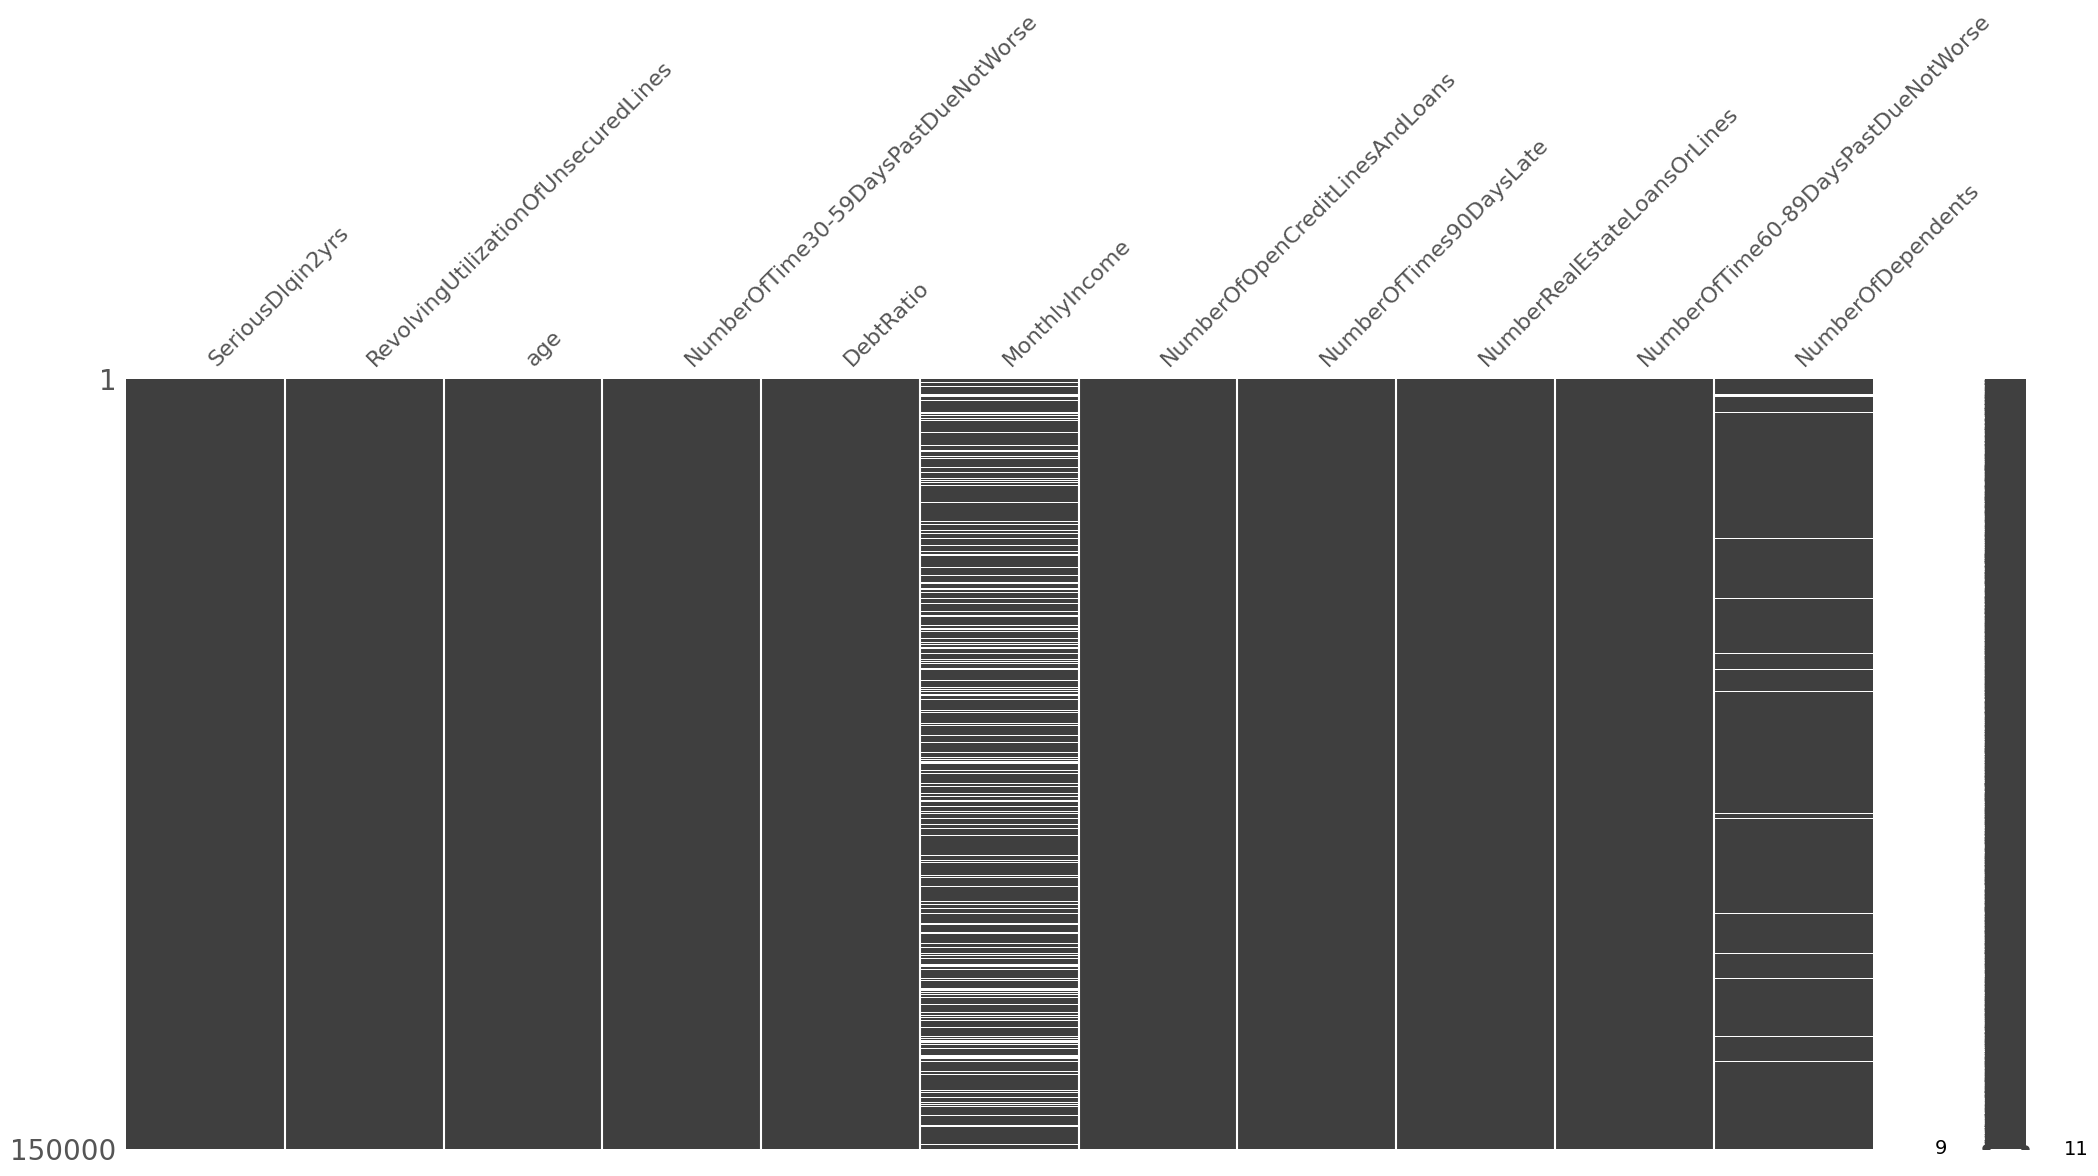

In [6]:
msgno.matrix(df.sort_values(by="SeriousDlqin2yrs"))

Não aparenta possuir algum padrão. Vamos avaliar a presença de duplicações:

In [7]:
num_dup = df.duplicated().sum()

if num_dup > 0:
  print(f" - Número de registros duplicados: {num_dup}")
  df.drop_duplicates(inplace=True)

 - Número de registros duplicados: 609


Temos 609 registros duplicados que já foram dropados. Vamos passar para a análise da estatística descritiva do dados.

In [8]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000,1.201700e+05,149391.000000,149391.000000,149391.000000,149391.000000,145563.000000
mean,0.066999,6.071087,52.306237,0.393886,354.436740,6.675098e+03,8.480892,0.238120,1.022391,0.212503,0.759863
std,0.250021,250.263672,14.725962,3.852953,2041.843455,1.438958e+04,5.136515,3.826165,1.130196,3.810523,1.116141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030132,41.000000,0.000000,0.177441,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154235,52.000000,0.000000,0.368234,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.556494,63.000000,0.000000,0.875279,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Já é possível observar algumas discrepâncias:
  - SeriousDlqin2yrs apresenta características de alto desbalanceamento de classes (percentis zerados, média muito baixa -> indica que apenas 6.7% dos dados são positivos);
  - Idade mínima com valor zerado;
  - DebtRatio com valor máximo muito absurdo (pra uma variável que representa taxa).
  - MonthlyIncome com valor mínimo zerado. Como obter crédito sem renda?
  - As variáveis NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse e NumberOfTimes90DaysLate têm valores máximos muito discrepantes e similares (98).
  - Praticamente todas as features apresentam valores extremos.

Vamos avaliar a assimetria/kurtosis e número de valores únicos das features:

In [9]:
df.agg(['skew', 'kurtosis', 'nunique'])

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
skew,3.463772,97.433211,0.192258,24.474608,94.979721,114.016565,1.221834,25.107372,3.484705,25.424388,1.583308
kurtosis,9.997852,14485.675317,-0.494039,616.245633,13681.588289,19493.999594,3.117281,637.852353,60.585918,649.093394,2.984288
nunique,2.000000,125728.000000,86.000000,16.000000,114194.000000,13594.000000,58.000000,19.000000,28.000000,13.000000,13.000000


 Já vemos que as distribuições das variáveis possuem forte assimetria positiva e picos acentuados (kurtosis > 3):

 - Vemos que apenas a feature de idade possui valor de assimetria (skewness) comportado. Todos os restantes estão fora do intervalo entre -1 a 1, o que indica assimetria extrema. Como todos possuem valores positivos, temos distribuições de cauda longa a direita e com grande possibilidade de presença de outliers.

 - Para kurtosis, apenas as variáveis NumberOfOpenCreditLinesAndLoans e NumberOfDependents possuem valores próximos de 3, o que seria mais próximo da normal.


 Vamos avaliar as porcentagens de outliers por feature:

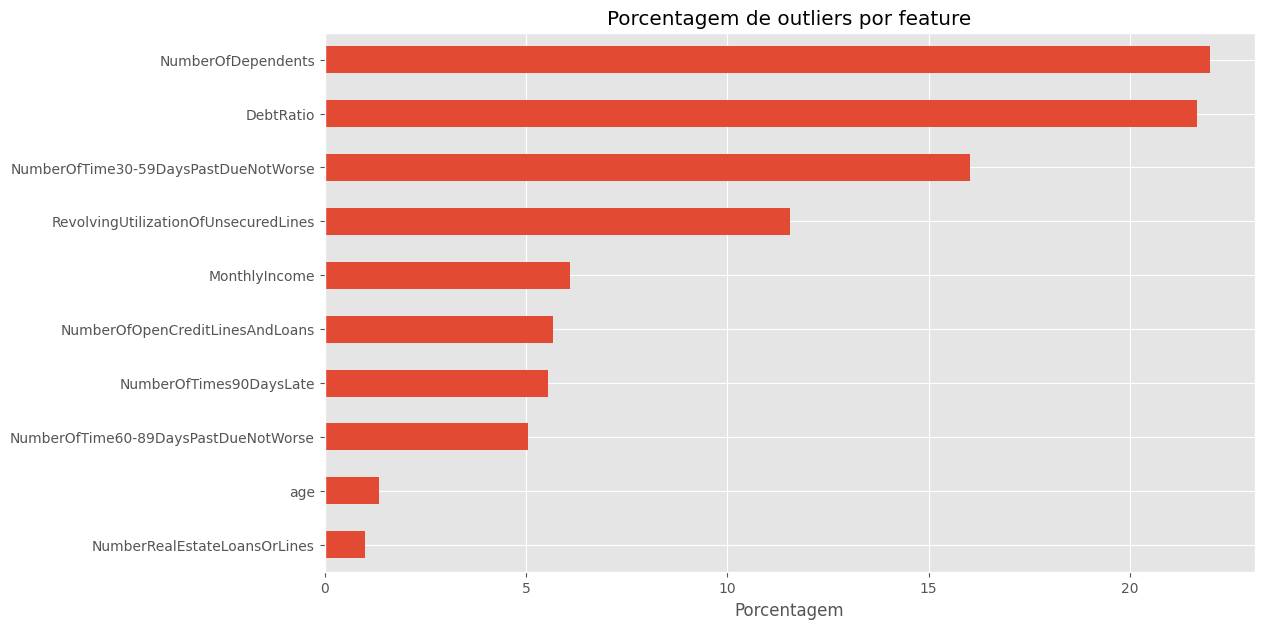

In [10]:
def get_perc_outliers(c):
  q3 = c.quantile(0.75)
  median = c.median()
  q1 = c.quantile(0.25)
  iqr = q3-q1

  lim_sup = median + 1.5*iqr
  lim_inf = median - 1.5*iqr

  num_outliers = (c>lim_sup).sum() + (c<lim_inf).sum()

  return 100*num_outliers/c.shape[0]

outliers_perc = df.drop("SeriousDlqin2yrs", axis=1).apply(lambda c: get_perc_outliers(c), axis=0)

outliers_perc.sort_values().plot.barh()
plt.title("Porcentagem de outliers por feature");
plt.xlabel("Porcentagem");

Vemos que as features NumberOfDependents e DebtRatio são as que possuem maior porcentagem de outliers (>20%). Todas as variáveis possuem outliers, sendo menos presentes em age e NumberOfRealEstateLoansOrLines.

Vamos agora avaliar a correlação entre as variáveis, mas antes vamos adicionar duas features que indicam a presença de valores faltantes nas features com outliers:

In [11]:
df["MonthlyIncome_ISNA"] = df["MonthlyIncome"].isna().astype(int)
df["NumberOfDependents_ISNA"] = df["NumberOfDependents"].isna().astype(int)

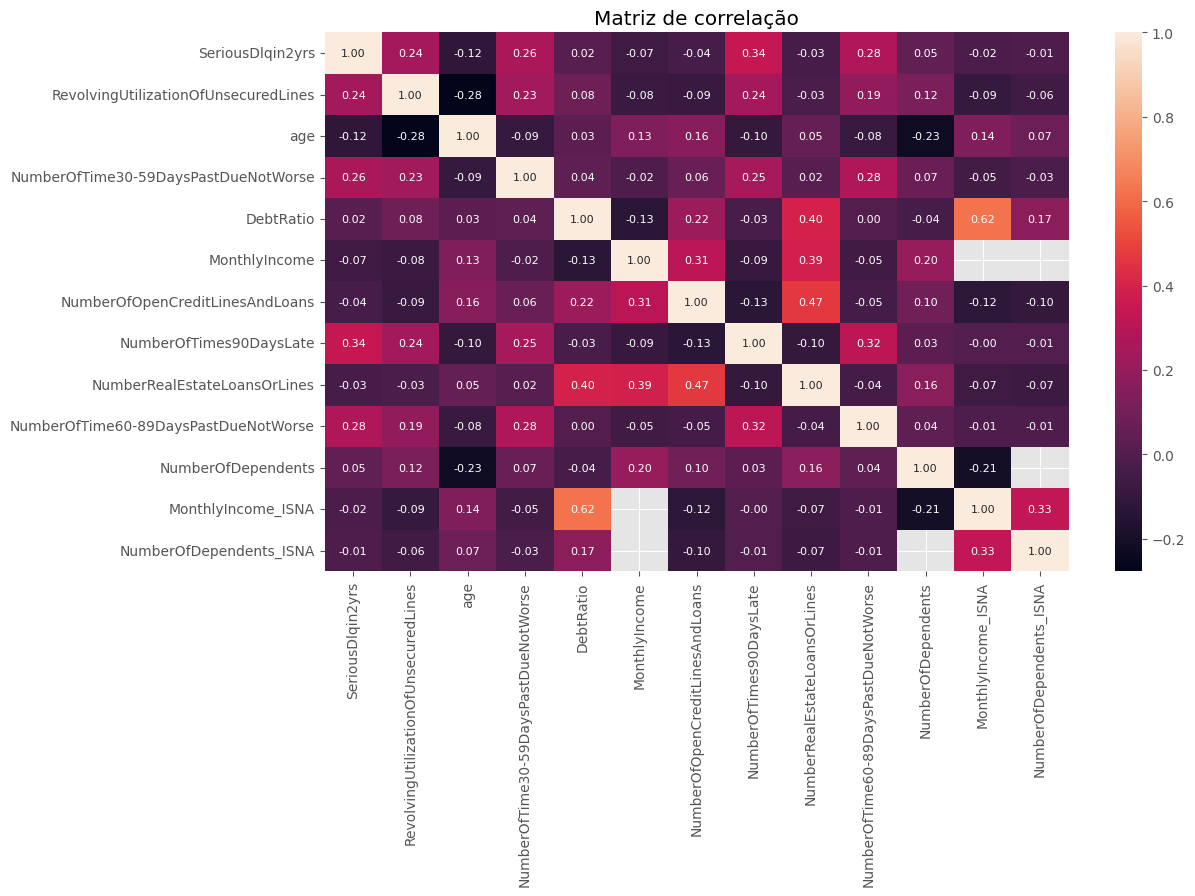

In [12]:
corr = df.corr("spearman")

sns.heatmap(corr,
            annot=True,
            fmt=".2f",
            annot_kws={'size':8}
            )

plt.title("Matriz de correlação");

A partir da matriz de correlação:
  - Vemos que a maior correlação para o target (mas ainda é um valor baixo) ocorre em NumberOfTimes90DaysLate, que indica o número de vezes que o clientes ficou 90+ dias sem pagamento;
  - Vemos valor moderado de correlação entre o indicador de valor faltante em MonthlyIncome e a feature DebtRatio.
  - Existe uma correlação baixa/moderada entre DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans e NumberRealEstateLoansOrLines.
  - No geral, as features possuem baixo nível de correlação entre elas.

Vamos avaliar a relação entre as variáveis citadas:

<Axes: xlabel='NumberOfTimes90DaysLate', ylabel='count'>

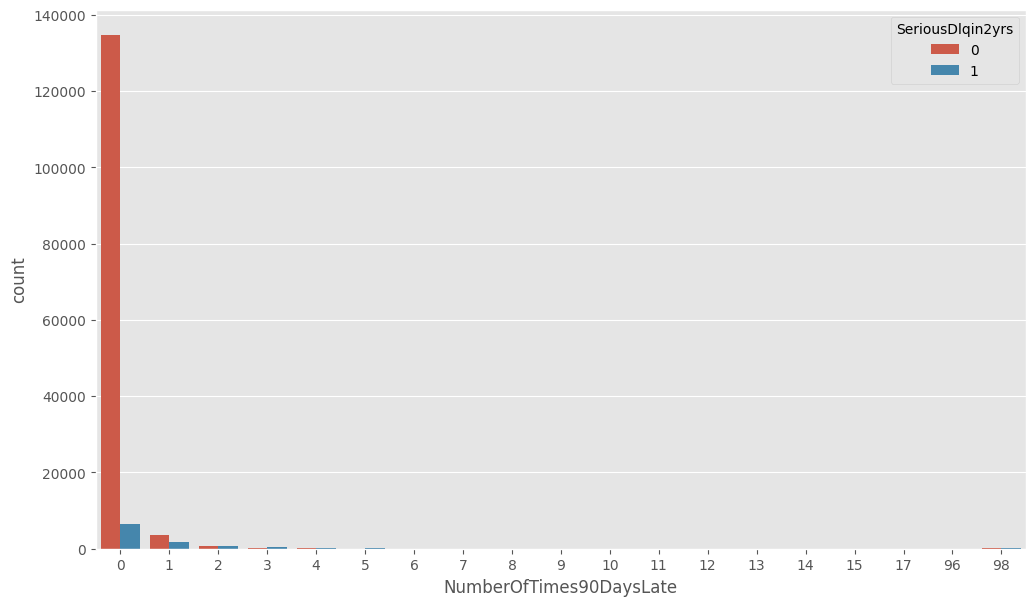

In [13]:
sns.countplot(df, x="NumberOfTimes90DaysLate", hue="SeriousDlqin2yrs")

Vemos que grande parte dos não inadimplentes estão concentrados em nenhum atraso de 90 dias, o que era de esperar. O que é estranho é a presença de inadimplentes em zero vezes, dado que é considerado inadimplente para 2+ anos sem pagamento, passando assim o periodo de 90 dias.

Vamos agora avaliar a relação de valores faltantes na variável MonthyIncome com a variável DebtRatio ordenada:

<Axes: >

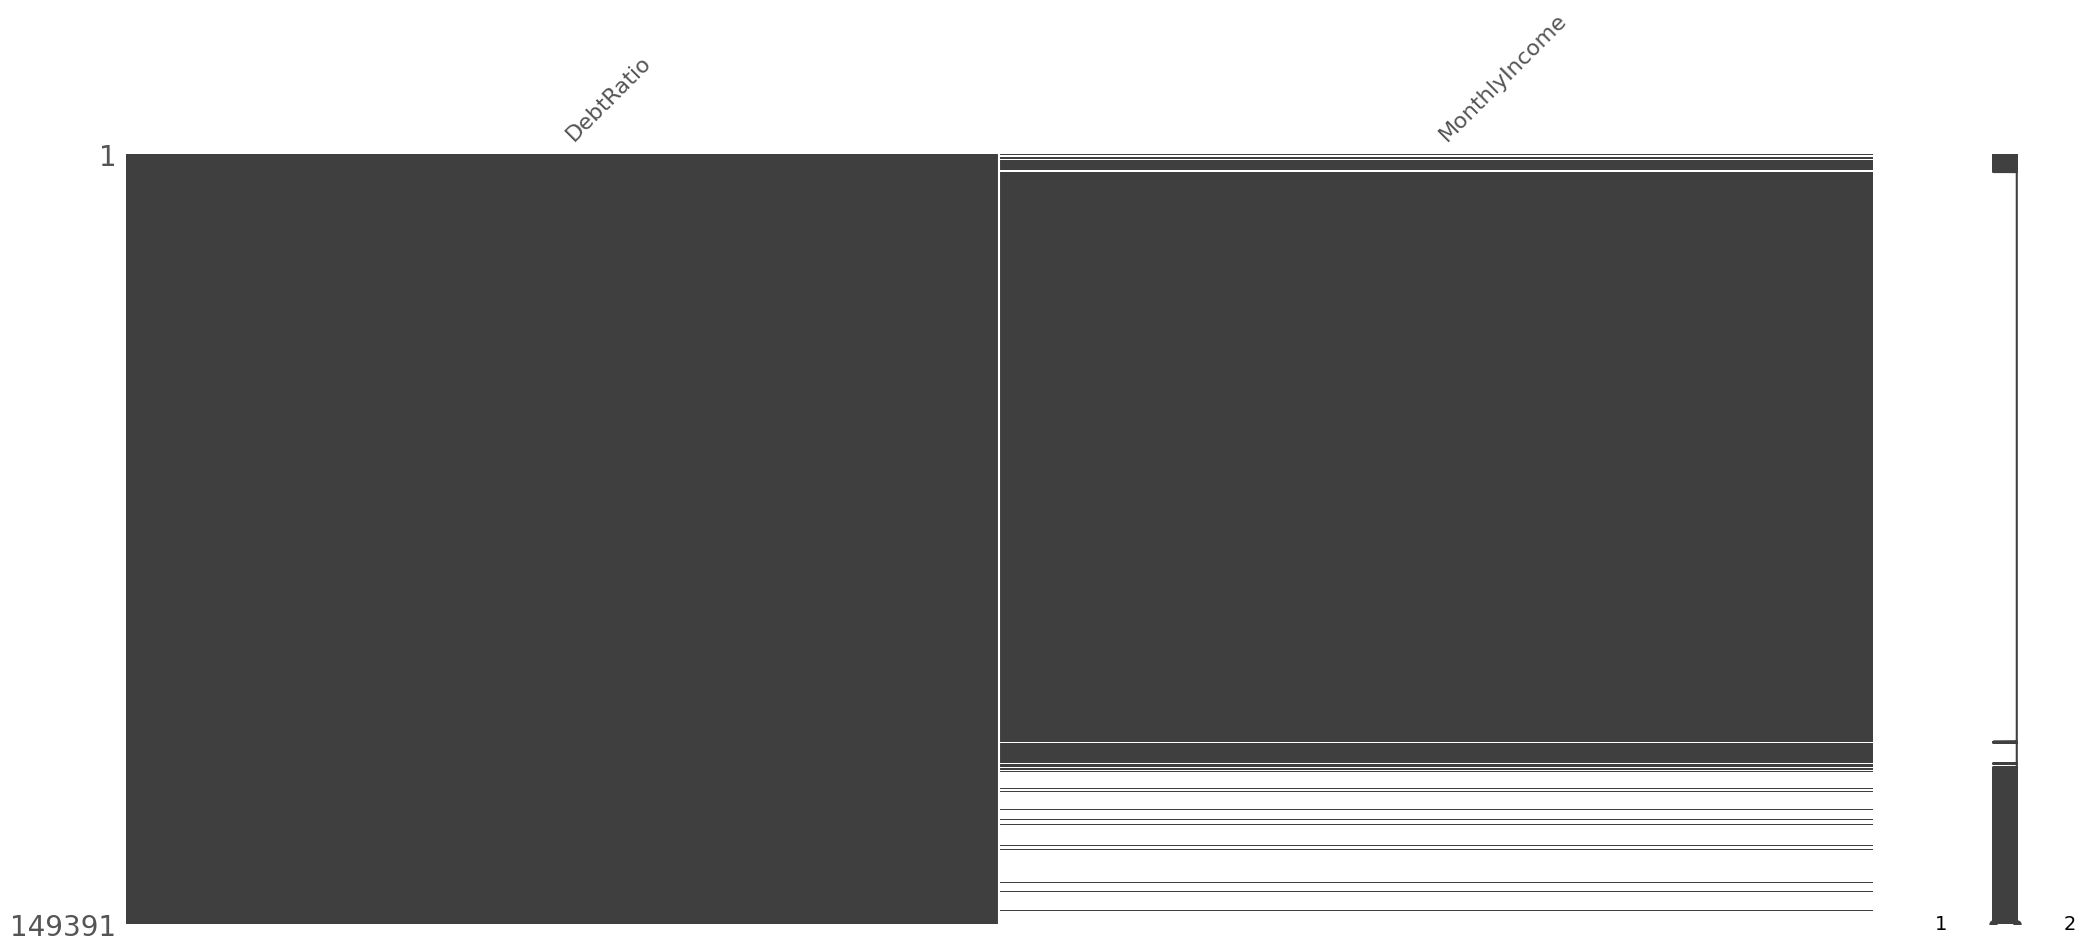

In [14]:
msgno.matrix(df[['DebtRatio', 'MonthlyIncome']].sort_values(by="DebtRatio"))

Vemos que temos alguns valores faltantes de MonthlyIncome para valores baixos de DebtRatio, mas grande parte dos valores faltantes se concentram nos valores altos da feature. Vamos avaliar a relação entre as duas features:

<Axes: xlabel='MonthlyIncome', ylabel='DebtRatio'>

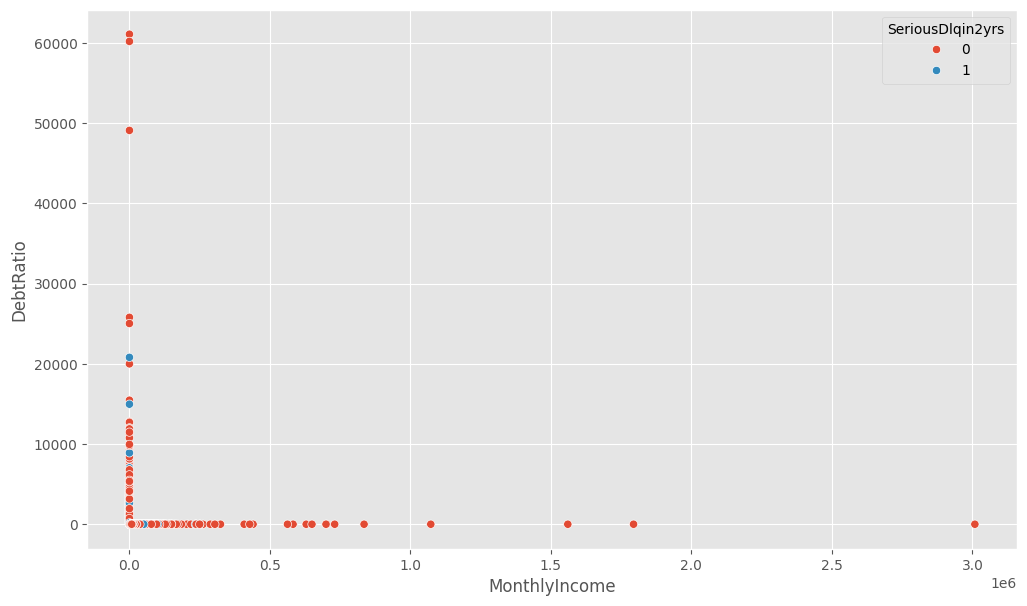

In [15]:
sns.scatterplot(df, x="MonthlyIncome", y="DebtRatio", hue="SeriousDlqin2yrs")

Vemos que os valores altos e outliers de DebtRatio se concentram em valores de MonthlyIncome mais próximos de zero. Sabemos que existe a inconsistência de valores de MonthlyIncome zerados, então vamos eliminar e avaliar como estes valores impactam o DebtRatio:

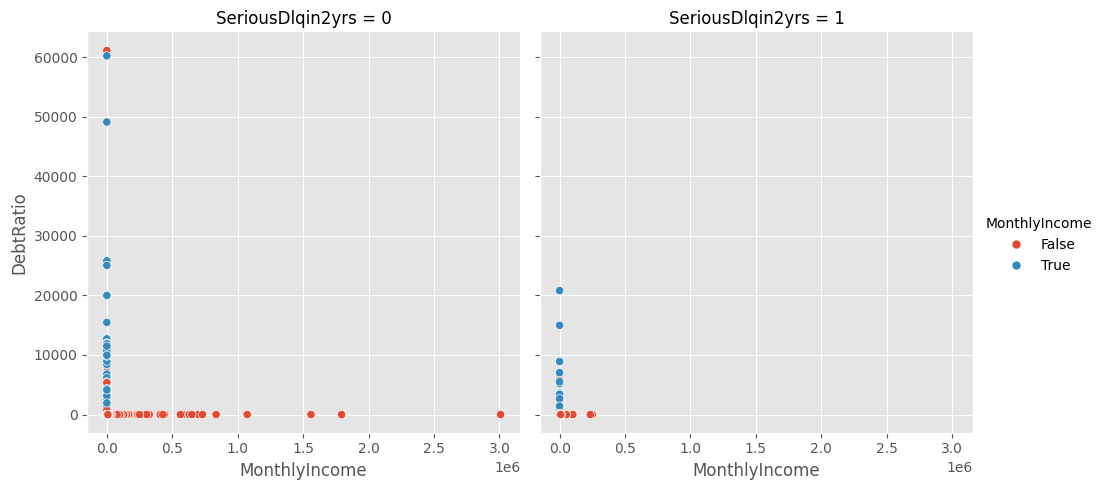

In [16]:
sns.relplot(df, x="MonthlyIncome", y="DebtRatio", hue=df["MonthlyIncome"]<=0, col="SeriousDlqin2yrs")

Vemos que os valores zerados são os responsáveis, em grande parte, pelos outliers presentes em DebtRatio. Ao pensar na feature em si, pode-se imaginar que ela seja a divisão dos débitos atuais pela renda da pessoa. Se esta renda é zerada ou próxima de 0, é natural os valores desta taxa explodirem.

Mas o que leva a uma pessoa ter renda zerada/próxima de zero ou o valor nulo? Um possível desemprego? É uma hipótese aceitável, visto que existe concessão de crédito para desempregados, ou a base de dados pode ser atualizada, podendo de ter ocorrido o desemprego após a concessão do crédito. Por fim, pode ser uma irregularidade.

Por fim, vamos avaliar a relação entre DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans e NumberRealEstateLoansOrLines.

<Axes: xlabel='NumberOfOpenCreditLinesAndLoans', ylabel='NumberRealEstateLoansOrLines'>

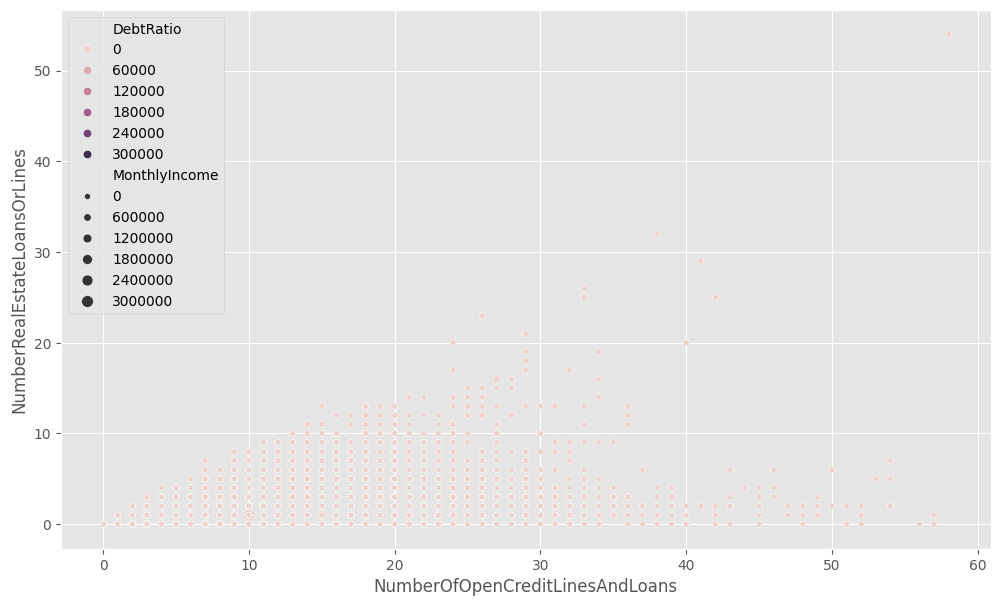

In [17]:
sns.scatterplot(df, x="NumberOfOpenCreditLinesAndLoans", y="NumberRealEstateLoansOrLines", hue="DebtRatio", size="MonthlyIncome")

Não é possível encontrar algum padrão claro.

### Feature Engineering:

In [18]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

Vamos inicialmente dividir os dados em treino/teste. Logo após, vamos utilizar alguma estratégia para preenchimento dos dados faltantes.

In [19]:
X = df.drop(["SeriousDlqin2yrs"], axis=1)
y = df["SeriousDlqin2yrs"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    stratify=y,
                                                    shuffle=True,
                                                    random_state=7
                                                    )

Vamos iniciar preenchendo os dados faltantes em NumberOfDependents. Como temos apenas 2.5% de valores faltantes, vamos preencher com a mediana:

In [20]:
num_depend_median = X_train["NumberOfDependents"].median()
num_depend_median

0.0

In [21]:
X_train["NumberOfDependents"].fillna(num_depend_median, inplace=True)
X_test["NumberOfDependents"].fillna(num_depend_median, inplace=True)

Para a variável MonthlyIncome que possui ~20% de valores faltantes, vamos utilizar o modelo KNearestNeighbors para preenchimento dos valores faltantes. Vamos primeiramente avaliar se os dados de treino e teste têm aproximadamente a mesma proporção de valores faltantes:

In [22]:
X_train["MonthlyIncome"].isna().sum()/X_train.shape[0], X_test["MonthlyIncome"].isna().sum()/X_test.shape[0]

(0.19487161179190132, 0.19778836885509266)

Estão bem similares. Vamos fazer a validação cruzada do KNN com 5 vizinhos e avaliar o MAE e o MSE:

In [23]:
model = KNeighborsRegressor(n_neighbors=5)

X_nona =  X_train.dropna()

preds = cross_val_predict(model, X_nona.drop("MonthlyIncome", axis=1) , X_nona["MonthlyIncome"], cv=5)

print("MAE: {:.2f}".format(mean_absolute_error(X_nona["MonthlyIncome"], preds)))
print("MSE: {:.2f}".format(mean_squared_error(X_nona["MonthlyIncome"], preds)))

MAE: 3317.94
MSE: 289627032.86


Estamos com um MAE que representa aprox. 50% da média de MonthlyIncome, e um valor muito alto de MSE. Isto é devido, em parte, à presença de outliers, mas o modelo será considerado suficiente para apenas preenchimento mais eficiente dos valores faltantes. Vamos ao treinamento nos dados completos e preenchimento dos valores faltantes:

In [24]:
model.fit(X_nona.drop("MonthlyIncome", axis=1) , X_nona["MonthlyIncome"])

preds_train = model.predict(X_train.loc[X_train["MonthlyIncome"].isna()].drop("MonthlyIncome", axis=1))

X_train.loc[X_train["MonthlyIncome"].isna(), "MonthlyIncome"] = preds_train

X_train.isna().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
MonthlyIncome_ISNA                      0
NumberOfDependents_ISNA                 0
dtype: int64

In [25]:
preds_test = model.predict(X_test.loc[X_test["MonthlyIncome"].isna()].drop("MonthlyIncome", axis=1))

X_test.loc[X_test["MonthlyIncome"].isna(), "MonthlyIncome"] = preds_test

X_test.isna().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
MonthlyIncome_ISNA                      0
NumberOfDependents_ISNA                 0
dtype: int64

Vamos agora adicionar algumas features:

In [26]:
X_train["Income_Dependent_Ratio"] = X_train["MonthlyIncome"]/(X_train["NumberOfDependents"] + 1)
X_train["Estimated_Debt"] = X_train["DebtRatio"]*X_train["MonthlyIncome"]
X_train["Total_Delays"] = X_train["NumberOfTime30-59DaysPastDueNotWorse"] + X_train["NumberOfTime60-89DaysPastDueNotWorse"] + X_train["NumberOfTimes90DaysLate"]

X_test["Income_Dependent_Ratio"] = X_test["MonthlyIncome"]/(X_test["NumberOfDependents"] + 1)
X_test["Estimated_Debt"] = X_test["DebtRatio"]*X_test["MonthlyIncome"]
X_test["Total_Delays"] = X_test["NumberOfTime30-59DaysPastDueNotWorse"] + X_test["NumberOfTime60-89DaysPastDueNotWorse"] + X_test["NumberOfTimes90DaysLate"]


### Modelagem

In [28]:
from xgboost import XGBClassifier

import shap

import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, classification_report, roc_auc_score, precision_recall_curve, auc

Primeiramente vamos definir um modelo baseline para comparações futuras. Aqui será utilizado o KNearestNeighboors com 5 vizinhos mais proximos:

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=5)

preds = cross_val_predict(knn_model, X_train, y_train, cv=5)

print(classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96    104536
           1       0.18      0.02      0.03      7507

    accuracy                           0.93    112043
   macro avg       0.56      0.51      0.50    112043
weighted avg       0.88      0.93      0.90    112043



O modelo baseline possui uma precisão de 18% e recall de 2% para a classe positiva na validação cruzada com 5 divisões, o que é extremamente baixo.

Vamos avaliar como o modelo XGBoost com otimização bayesiana de hiperparametros irá performar para avaliar e comparar a performance com o baseline:

In [30]:
# Definição dos hiperparâmetros e espaço de busca

space={'max_depth': hp.quniform("max_depth", 3, 15, 1),
        'gamma': hp.uniform ('gamma', 1, 9),
        'reg_alpha' : hp.quniform('reg_alpha', 40, 180, 1),
        'reg_lambda' : hp.uniform('reg_lambda', 0, 1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
        'n_estimators': hp.quniform('n_estimators', 20, 250, 10)
    }

In [31]:
# Definição da função custo com a métrica e metodologia desejada

def cost_function(space):
    model = XGBClassifier(n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                          reg_alpha = space['reg_alpha'], min_child_weight=space['min_child_weight'],
                          colsample_bytree=space['colsample_bytree'])

    preds_proba = cross_val_predict(model, X_train, y_train, cv=5, method="predict_proba")
    preds_proba = preds_proba[:, 1]

    # precision, recall, _ = precision_recall_curve(y_train, preds_proba)

    # auc_pr = auc(recall, precision)

    roc_auc = roc_auc_score(y_train, preds_proba)

    return {'loss': -roc_auc, 'status': STATUS_OK, 'model': model}

In [32]:
# Iniciando o processo de otimização

trials = Trials()
best = fmin(fn=cost_function,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print(best)

100%|██████████| 100/100 [07:29<00:00,  4.50s/trial, best loss: -0.8625804648092077]
{'colsample_bytree': 0.983725862798045, 'gamma': 1.0207503328467213, 'max_depth': 11.0, 'min_child_weight': 2.0, 'n_estimators': 130.0, 'reg_alpha': 42.0, 'reg_lambda': 0.3878446623662802}


In [33]:
# Treinando o modelo com o melhor conjunto de hiperparâmetros encontrado na otimização

model = XGBClassifier(n_estimators = int(best['n_estimators']), max_depth = int(best['max_depth']), gamma = best['gamma'],
                          reg_alpha = best['reg_alpha'], min_child_weight=best['min_child_weight'],
                          colsample_bytree=best['colsample_bytree'])

preds_proba = cross_val_predict(model, X_train, y_train, cv=5, method="predict_proba")[:, 1]
preds = np.round(preds_proba)

print(classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97    104536
           1       0.60      0.18      0.27      7507

    accuracy                           0.94    112043
   macro avg       0.77      0.58      0.62    112043
weighted avg       0.92      0.94      0.92    112043



Vemos que as métricas obtidas pelo XGB são por volta de três a cinco vezes melhores que o modelo baseline. As métricas estão relativamente baixas, mas dependendo da visão/objetivos de uma área negocial, podem ser suficientes.

Vemos uma precisão mais alta que recall. Isto indica que o comportamento deste modelo será no sentindo de permitir mais falsos negativos (ter mais inadimplência) e apontar melhor a inadimplência para um perfil mais delimitado em uma região de certeza do modelo. Isto pode ser modificado alterando o limiar de probabilidade para classificação, obtendo diferentes configurações de precisão/recall.

Vamos avaliar o ROC-AUC e o AUC-PR:

In [34]:
roc_auc_score(y_train, preds_proba)

0.8625804648092077

In [35]:
precision, recall, _ = precision_recall_curve(y_train, preds_proba)
auc_pr = auc(recall, precision)
auc_pr

0.3938453458370556

Temos um ROC-AUC bom, mas um AUC-PR baixo. Para dados com grande nível de desbalanceamento, como neste caso, o ROC-AUC pode não ser a melhor métrica (a taxa de falsos positivos é reduzida devido a um grande número de verdadeiros negativos), sendo o AUC-PR um melhor indicativo de performance do modelo.

Vamos agora avaliar os dados de teste:

In [36]:
space = best
model = XGBClassifier(n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                          reg_alpha = space['reg_alpha'], min_child_weight=space['min_child_weight'],
                          colsample_bytree=space['colsample_bytree'])

model.fit(X_train, y_train)

preds_proba = model.predict_proba(X_test)[:, 1]
preds = np.round(preds_proba)

In [37]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     34846
           1       0.61      0.17      0.27      2502

    accuracy                           0.94     37348
   macro avg       0.78      0.58      0.62     37348
weighted avg       0.92      0.94      0.92     37348



In [38]:
roc_auc_score(y_test, preds_proba)

0.8688355806773969

In [39]:
precision, recall, _ = precision_recall_curve(y_test, preds_proba)
auc_pr = auc(recall, precision)
auc_pr

0.4065195758727275

Temos valores de métricas muito similares aos obtidos pela validação cruzada dos dados de treinamento.

Vamos avaliar se o modelo está apresentando sobreajuste:

In [40]:
preds = model.predict(X_train)
print(classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97    104536
           1       0.62      0.18      0.28      7507

    accuracy                           0.94    112043
   macro avg       0.78      0.59      0.62    112043
weighted avg       0.92      0.94      0.92    112043



Vemos que a performance do modelo nos dados de treinamento é muito similar à obtida nos dados de teste, indicando a não existência de sobreajuste. Por fim, vamos avaliar com o SHAP as features mais impactantes para as predições do modelo:

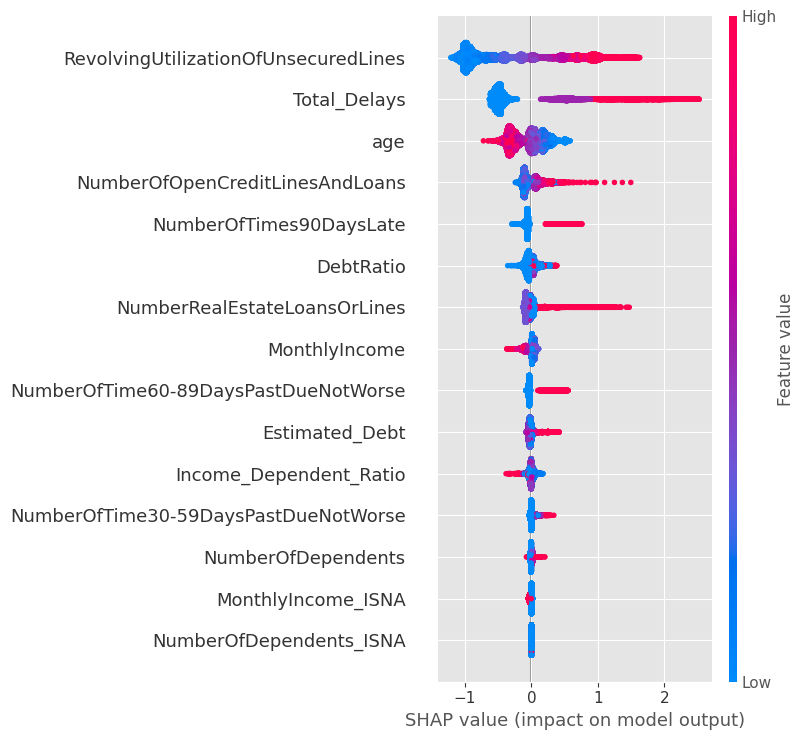

In [41]:
shap_values = shap.TreeExplainer(model).shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type='dot')

Vemos que a variável que mais impacta positivamente com valores mais altos e negativamente com valores baixos para o modelo foi a RevolvingUtilizationOfUnsecuredLines que indica o valor da dívida dividida pelo total de limite de crédito disponível. É uma feature interessante e pode ser melhor trabalhada.

Em seguida temos a feature Total_Delays, que foi adicionada pelo processo de feature engineering.

O modelo considera que pessoas com menor idade são mais propensas a serem inadimplentes, visto que elas impactam mais positivamente na saída do modelo. O mesmo ocorre para monthlyIncome (salários mais baixos têm maior tendência à inadimplência) e Income_Dependent_Ratio, que é uma das variáveis criadas.

As features ISNA são as que menos/não impactam na saída do modelo.

### Considerações finais

 - A etapa de exploração de dados pode ser mais aprofundada, com mais avaliações univariáveis e multivariáveis em busca de mais padrões informativos;
 - Os dados apresentam algumas inconsistências, mas visto que faz parte de um desafio kaggle, e que esse tipo de informação geralmente é sintética ou reduzida por ser sensível, não foi dado muita atenção neste projetinho;
 - A etapa de feature engineering pode ser melhorada criando até mesmo features polinomiais, utilizar WOE e IV (weight of evidence e information value) e a adição de uma etapa de seleção de features;
 - As features podem ser normalizadas, além de um tratamento de outliers;
 - Na modelagem podem ser testados modelos mais simples e/ou mais complexos. Pelo desafio Kaggle, o melhor colocado ficou com um ROC-AUC de aproximadamente 0.8695, sendo que o alcançado pelo modelo aqui desenvolvido ficou próximo.